In [1]:
########## ML - LIFT CHART
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#### Daten laden
data = pd.read_csv('/home/jovyan/Documents/Data/pima-indians-diabetes.csv',',',header=None)
target = 8
X = data.drop(target,axis=1)
#X = pd.concat([X.drop(['paymentMethod','orderDate','title'], axis=1), pd.get_dummies(X['paymentMethod'])], axis=1)
y = data[target]

In [3]:
#### Modell erstellen & Vorhersage
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X,y);
y_pred = logreg.predict(X)
y_pred_proba = logreg.predict_proba(X)[:,1]
y_pred_proba_2 = logreg.predict_proba(X)
data['y_pred_proba'] = y_pred_proba

In [4]:
#### Kurz Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(roc_auc_score(y,y_pred_proba))

[[448  52]
 [120 148]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768

0.8368507462686565


0    0.038961
1    0.051948
2    0.090909
3    0.171053
4    0.246753
5    0.298701
6    0.500000
7    0.532468
8    0.675325
9    0.883117
Name: percentage, dtype: float64

Rate: 0.35


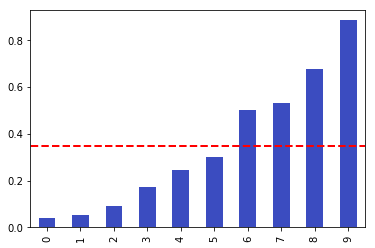

In [5]:
#### Lift Chart
data = data.sort_values('y_pred_proba')
data['decile'] = pd.qcut(data['y_pred_proba'], 10, labels=False)
data = data[['decile',target]]



to_plot = data.groupby(['decile',target])[target].count()
to_plot = to_plot.unstack().reset_index(inplace=False)
to_plot.fillna(0,inplace=True)
to_plot['percentage'] = to_plot[1] / (to_plot[0] + to_plot[1])
to_plot = to_plot[['decile','percentage']].reset_index(drop=True)
rate = sum(data[target] == 1) / len(data)

ax = to_plot['percentage'].plot(kind='bar',colormap='coolwarm')
print(to_plot['percentage'])
print("\nRate: {}".format(np.round(rate,2)))
ax.axhline(y=rate, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
ax

In [ ]:
# Email an Top-10% sortiert nach Proba: 
# ==> wird 88% echte churner targeten

In [6]:
# https://www.kdnuggets.com/2016/03/lift-analysis-data-scientist-secret-weapon.html
    
## lift score = ( predicted rate / average rate )
## Lift score für top 10% sortiert nach predicted prob: 0.88 / 0.34 = 2.59 
## ==> wenn man an top 10% (nach proba) email schickt, 
#      dann target man 2.59 mal echte churner als bei targeting der selben anzahl mit random auswahl

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


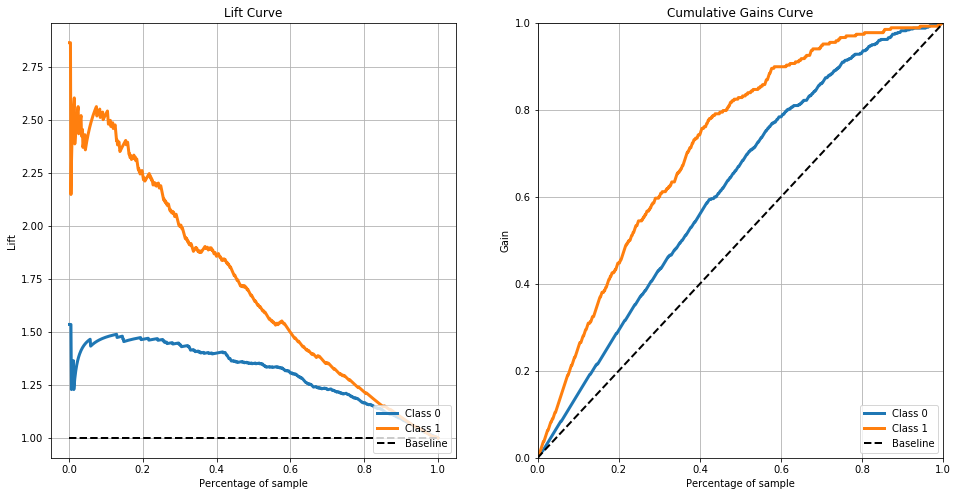

In [7]:
import matplotlib.pyplot as plt
import scikitplot as skplt

plt.figure(figsize=(16,8))
ax = plt.subplot(1,2,1)
#ax.set_xlim((0.01,1))
#ax.set_ylim((-.5,2))
skplt.metrics.plot_lift_curve(y, y_pred_proba_2,ax=ax)

ax = plt.subplot(1,2,2)
skplt.metrics.plot_cumulative_gain(y, y_pred_proba_2, ax=ax)
#plt.xlim(0.01,1)